In [2]:
## Implementation of ANN using keras

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [4]:
# Checking version of tensorflow as keras
tf.__version__

'2.15.0'

In [5]:
# print(tf.keras.__version__)

In [6]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

## Creating a simple classifier using keras.

In [8]:
mnist=tf.keras.datasets.mnist

In [9]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [10]:
(x_train_full, y_train_full), (x_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [11]:
x_train_full.shape, y_train_full.shape

((60000, 28, 28), (60000,))

In [12]:
x_train_full[0].shape

(28, 28)

In [13]:
y_train_full[0]

5

In [14]:
x_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [15]:
# Create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range

x_valid, x_train= x_train_full[:5000]/255., x_train_full[5000:]/255
y_valid, y_train= y_train_full[:5000] , y_train_full[5000:]

In [16]:
# Scale the test set as well
x_test=x_test/255

In [17]:
x_valid.shape, y_valid.shape

((5000, 28, 28), (5000,))

In [18]:
x_train.shape, y_train.shape

((55000, 28, 28), (55000,))

In [19]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

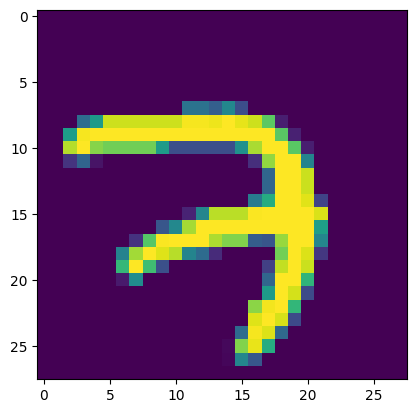

In [20]:
# Lets views sime data
plt.imshow(x_train[0])
plt.show()

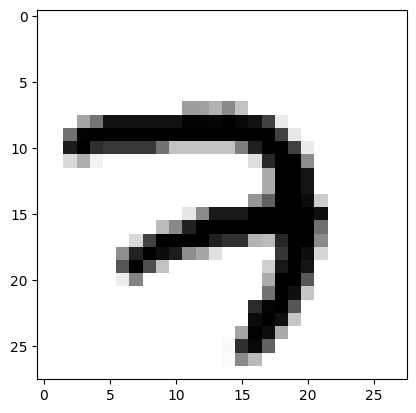

In [21]:
plt.imshow(x_train[0],cmap='binary')
plt.show()

<Axes: >

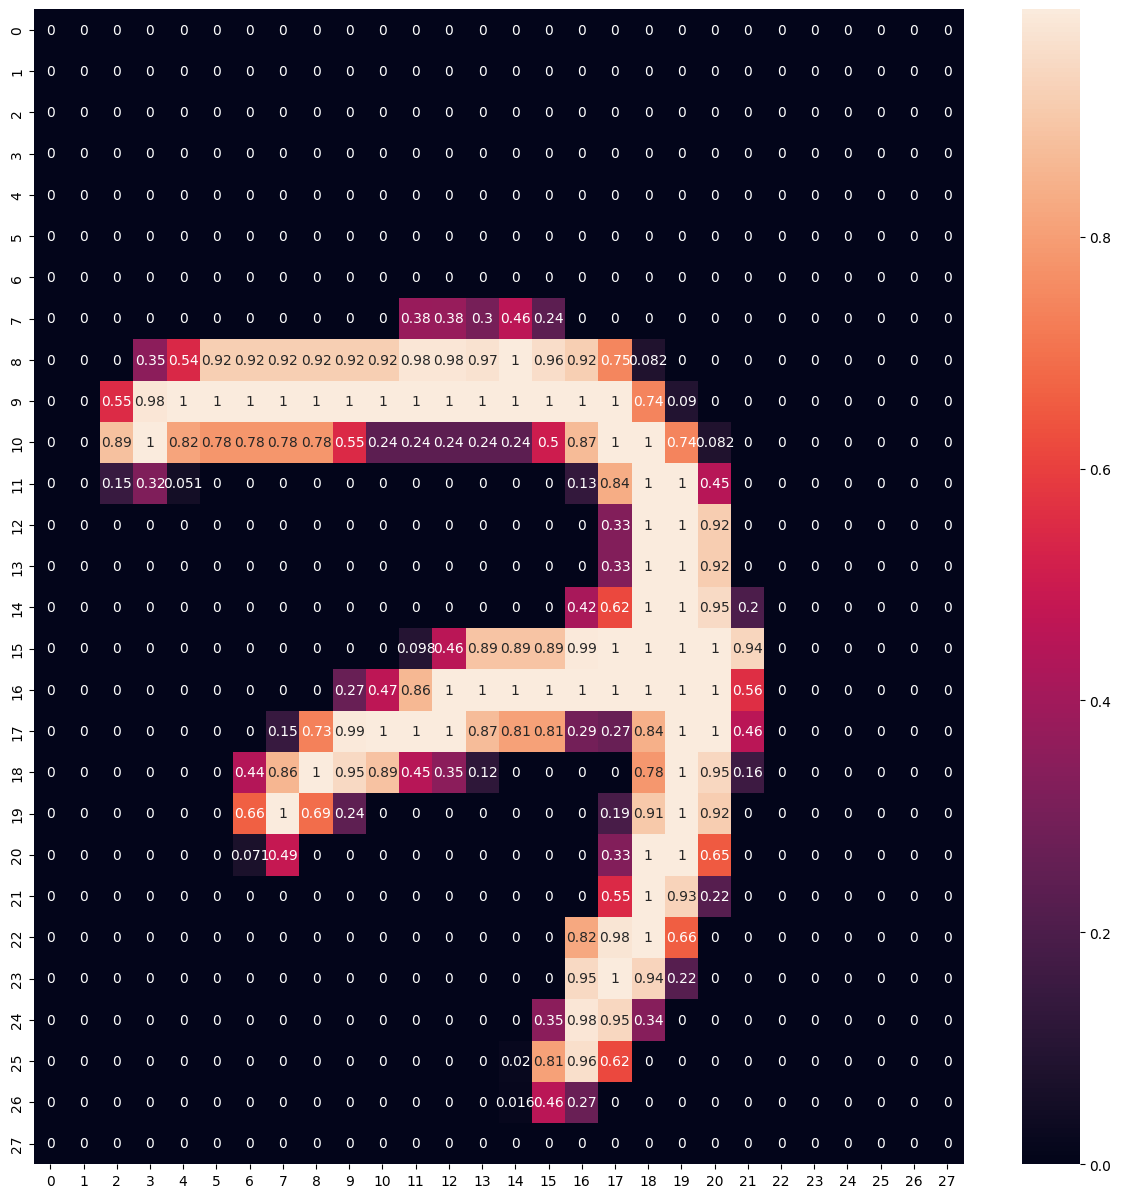

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train[0], annot=True)

In [23]:
## Crating layers of ANM
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"),
        tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
        tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2" ),
        tf.keras.layers.Dense(10, activation="softmax", name="optputLayer")

]

In [24]:
model_clf=tf.keras.models.Sequential(LAYERS)

In [25]:
model_clf.layers

In [26]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 optputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
28*28*300+300

235500

In [28]:
300*100+100

30100

In [29]:
100*10+10

1010

In [30]:
235500+30100+1010

266610

In [31]:
## To check the weights that are assigned to first layer.
hidden=model_clf.layers[1]
hidden.name

'hiddenLayer1'

In [32]:
hidden.get_weights()  # gives two array one is weights and another is bias.

[array([[ 0.063609  ,  0.07301427,  0.05545251, ..., -0.03987585,
          0.00904544, -0.06170593],
        [ 0.01445167, -0.01952767,  0.04002176, ...,  0.02756362,
          0.03446538, -0.01224714],
        [-0.01320466,  0.03326495,  0.03870431, ..., -0.04237259,
          0.01149897,  0.05579077],
        ...,
        [ 0.03297586, -0.04277622, -0.01386924, ..., -0.07392025,
          0.0492793 ,  0.04239235],
        [-0.05045947, -0.01517003, -0.00991919, ..., -0.05700299,
          0.04591754, -0.03438964],
        [-0.02796041, -0.06163314,  0.02810549, ..., -0.04587873,
         -0.04288635, -0.06353743]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [33]:
LOSS_FUNCTION="sparse_categorical_crossentropy"
OPTIMIZER="SGD"
METRICS=["accuracy"]

In [34]:
model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [35]:
# Training
EPOCHS=30
VALIDATION_DATA=(x_valid, y_valid)

In [36]:
history=model_clf.fit(x_train,
                      y_train,
                      epochs=EPOCHS,
                      validation_data=VALIDATION_DATA,
                      batch_size=32
                      )

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6020 - accuracy: 0.8457 - val_loss: 0.3158 - val_accuracy: 0.9120
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2913 - accuracy: 0.9168 - val_loss: 0.2533 - val_accuracy: 0.9278
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2396 - accuracy: 0.9314 - val_loss: 0.2117 - val_accuracy: 0.9398
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2047 - accuracy: 0.9419 - val_loss: 0.1825 - val_accuracy: 0.9510
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1779 - accuracy: 0.9496 - val_loss: 0.1630 - val_accuracy: 0.9546
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1568 - accuracy: 0.9557 - val_loss: 0.1497 - val_accuracy: 0.9582
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1403 - accuracy: 0.9603 - val_loss: 0.1363 - val_accuracy:

In [47]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [48]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.602010,0.845655,0.315787,0.9120
1,0.291274,0.916800,0.253295,0.9278
2,0.239595,0.931418,0.211663,0.9398
3,0.204672,0.941873,0.182549,0.9510
4,0.177943,0.949600,0.163003,0.9546
5,0.156775,0.955745,0.149661,0.9582
6,0.140341,0.960255,0.136294,0.9606
7,0.126460,0.964618,0.123327,0.9694
8,0.114981,0.967873,0.119019,0.9684
9,0.105062,0.971091,0.109631,0.9712


<Axes: >

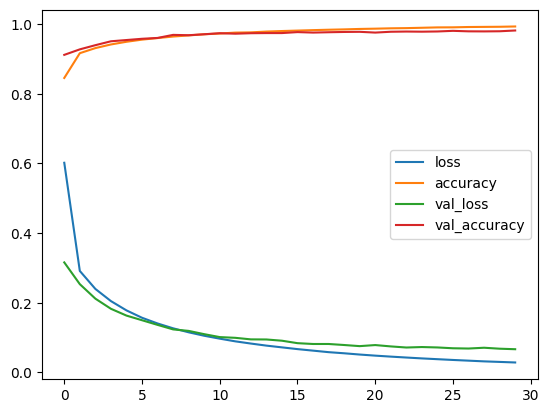

In [49]:
pd.DataFrame(history.history).plot()

In [50]:
## Model evaluation
model_clf.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0685 - accuracy: 0.9782


[0.06847304850816727, 0.9782000184059143]

In [51]:
# Sampel check test data
x_new=x_test[:5]

In [52]:
x_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

    

In [53]:
actual=y_test[:5]

In [54]:
actual

array([7, 2, 1, 0, 4], dtype=uint8)

In [55]:
y_prob=model_clf.predict(x_new)
y_prob.round(2)

1/1 [==============================] - 0s 17ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [59]:
y_pred=np.argmax(y_prob, axis=1)

In [60]:
y_pred

array([7, 2, 1, 0, 4])

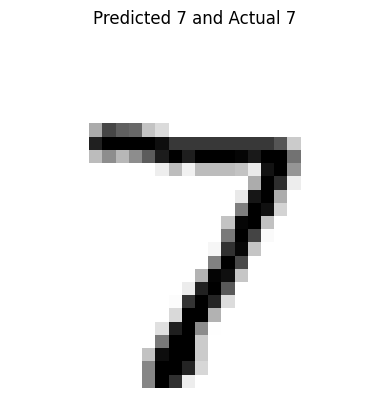

######################


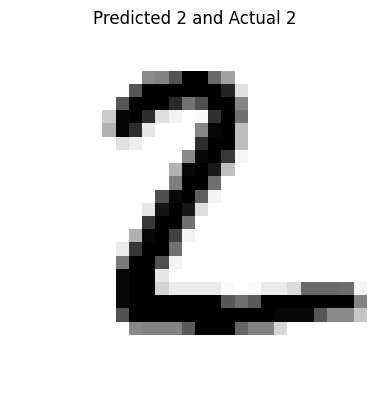

######################


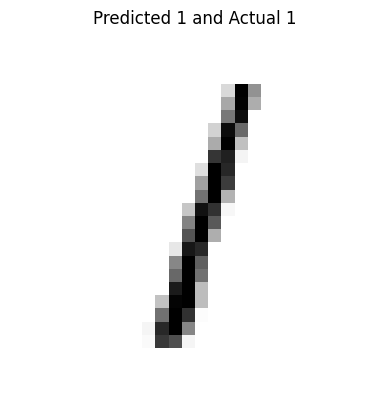

######################


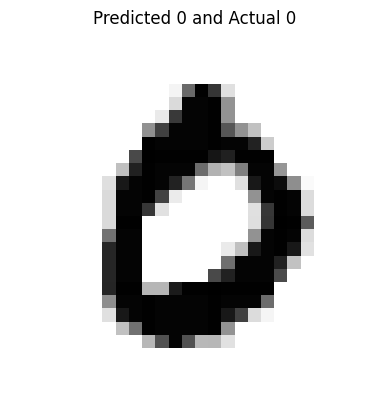

######################


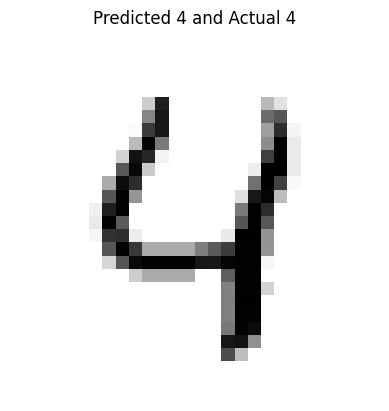

######################


In [61]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("######################")